## 1.Defining Problem Statement and Analysing basic metrics

### Problem Statement:
**The aim is to understand the current state of netflix library , extract the insights and trends and provide recommendations on what type of shows/movies to produc and grow business in different countries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [3]:
data = pd.read_csv('/kaggle/input/netflix/netflix.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
data.ndim

2

In [7]:
data.shape # rows and columns in data frame

(8807, 12)

In [8]:
data.dtypes # data types of all attributes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [9]:
data.info() # provides summary information about data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**From above data we can say that only column type is Categorical column**

In [11]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [12]:
data.isnull().sum() # returns the sum of null values in each column

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
missing_value_table = pd.DataFrame({
    'Null Count': data.isnull().sum(),
    'Non-Null Count': data.notnull().sum()
})

missing_value_table

,Null Count,Non-Null Count
show_id,0,8807
type,0,8807
title,0,8807
director,2634,6173
cast,825,7982
country,831,7976
date_added,10,8797
release_year,0,8807
rating,4,8803
duration,3,8804


In [14]:
data.describe() #returns statistical summary of only numeric columns

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [15]:
data.describe(include='object').T # this gives statistical summary of all columns

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


## Non-Graphical Analysis: Value counts and unique attributes

In [16]:
data.nunique() # Gives count of unique values in each colum

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**By results from above analysis type and rating are only columns that have unique attributes rest are continuous**

In [17]:
# To get unique values from specific column
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
# To get unique value count from especific column
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [19]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [20]:
data['type'].value_counts(normalize=True)*100 # we can get percentage as well

type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64

In [21]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

**Pre-processing**

In [22]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Filling with other values for null attributes**

In [23]:
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data.country.fillna("Country Unavailable", inplace=True)

**For date column i used ffill which fills missed data with previous rows data**

In [24]:
data['date_added'].fillna(method='ffill', inplace=True)

**For index column null values are relaced by mode of column**

In [25]:
x = data['rating'].value_counts().index[0]
data.rating.fillna(x,inplace=True)

In [26]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

**Un-nesting columns those have cells with multiple comma separated values by creating multiple rows**

**From data we can see that country,director,cast,listed_in rows have multiple values seperated by commas**

In [27]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df=data

In [29]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','cast']
df_new

,title,cast
0,Dick Johnson Is Dead,No Cast
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [30]:
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new_coun=pd.DataFrame(constraint,index=df['title'])
df_new_coun=df_new_coun.stack()
df_new_coun=pd.DataFrame(df_new_coun)
df_new_coun.reset_index(inplace=True)
df_new_coun=df_new_coun[['title',0]]
df_new_coun.columns=['title','country']
df_new_coun

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Country Unavailable
3,Jailbirds New Orleans,Country Unavailable
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,Country Unavailable
10842,Zombieland,United States
10843,Zoom,United States


In [31]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new_gen=pd.DataFrame(constraint,index=df['title'])
df_new_gen=df_new_gen.stack()
df_new_gen=pd.DataFrame(df_new_gen)
df_new_gen.reset_index(inplace=True)
df_new_gen=df_new_gen[['title',0]]
df_new_gen.columns=['title','genre']
df_new_gen

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [32]:
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new_dir=pd.DataFrame(constraint,index=df['title'])
df_new_dir=df_new_dir.stack()
df_new_dir=pd.DataFrame(df_new_dir)
df_new_dir.reset_index(inplace=True)
df_new_dir=df_new_dir[['title',0]]
df_new_dir.columns=['title','director']
df_new_dir

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,No Director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,No Director
4,Kota Factory,No Director
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,No Director
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


**Now Merging all using title as commom colum one by one**

In [33]:
df_cast_coun = pd.merge(df_new,df_new_coun,on='title')

df_cast_coun_gen= pd.merge(df_cast_coun,df_new_gen,on='title')

df_cast_coun_gen_dir = pd.merge(df_cast_coun_gen,df_new_dir,on='title')

**Merged with original data to get final preprocessed data**

In [34]:
df_pre_process = pd.merge(df,df_cast_coun_gen_dir,on='title') 
df_pre_process.head()

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in,description,cast_y,country_y,genre,director_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director
2,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director
3,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director
4,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director


**remove dulicate columns and rename the new generaeted rows**

In [35]:
df_pre_process.drop(['director_x','cast_x','country_x','listed_in'],inplace=True,axis=1)

df_pre_process.rename({'cast_y':'cast','country_y':'country','director_y':'director'},axis=1,inplace=True)

df_pre_process

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,International Movies,Mozez Singh
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,Music & Musicals,Mozez Singh
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,Dramas,Mozez Singh
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,International Movies,Mozez Singh


In [36]:
df_pre_process.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        3
description     0
cast            0
country         0
genre           0
director        0
dtype: int64

**For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

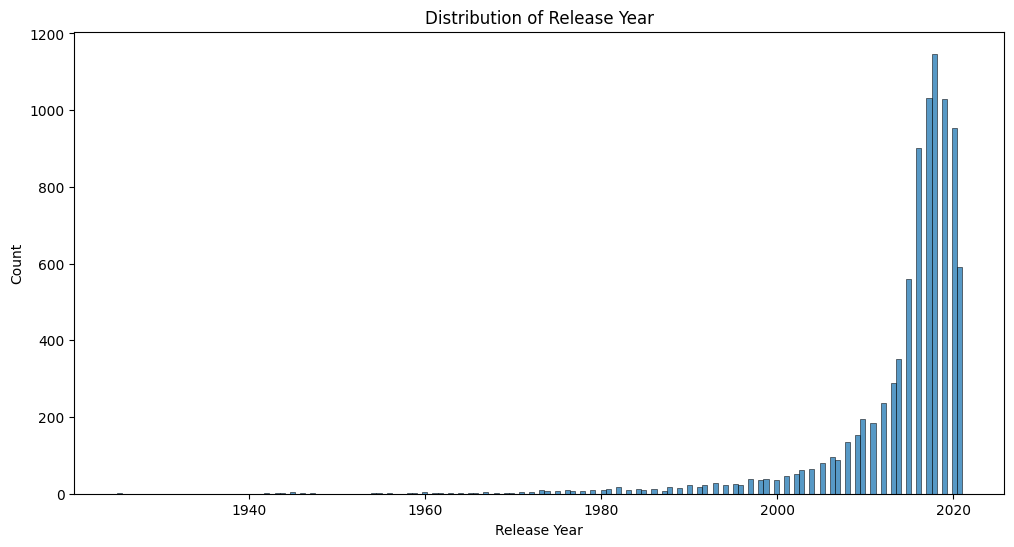

In [39]:
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'])
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

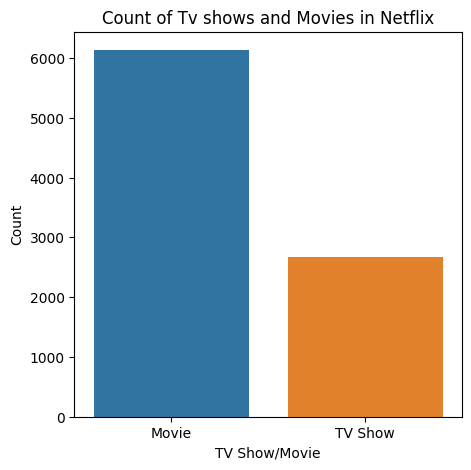

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x='type',data=df)
plt.xlabel("TV Show/Movie")
plt.ylabel("Count")
plt.title('Count of Tv shows and Movies in Netflix')
plt.show()

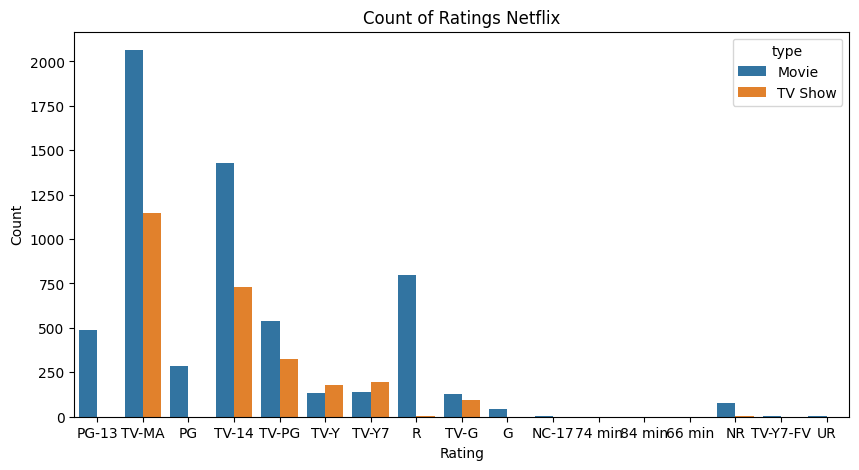

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=df)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title('Count of Ratings Netflix')
plt.show()

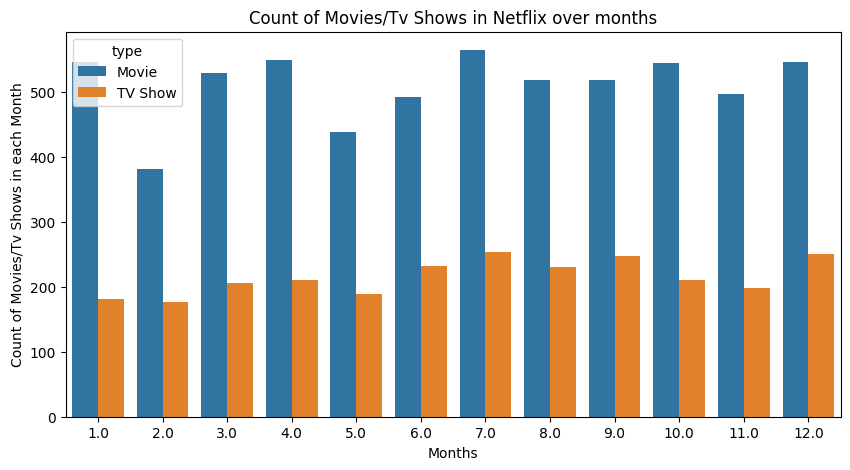

In [48]:
x = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')
plt.figure(figsize=(10,5))
sns.countplot(x=x.dt.month,hue='type',data=df)
plt.xlabel("Months")
plt.ylabel("Count of Movies/Tv Shows in each Month")
plt.title('Count of Movies/Tv Shows in Netflix over months')
plt.show()

In [49]:
df_pre_process.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        3
description     0
cast            0
country         0
genre           0
director        0
dtype: int64

**Fill duration column null values with max occouring values of that type**

In [50]:
df_pre_process[df_pre_process['duration'].isnull()==True]

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director
126537,s5542,Movie,Louis C.K. 2017,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi...",Louis C.K.,United States,Movies,Louis C.K.
131603,s5795,Movie,Louis C.K.: Hilarious,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...,Louis C.K.,United States,Movies,Louis C.K.
131737,s5814,Movie,Louis C.K.: Live at the Comedy Store,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...,Louis C.K.,United States,Movies,Louis C.K.


In [51]:
x1 = df_pre_process.groupby('type')['duration'].value_counts().get('Movie').index[0]
x1

'94 min'

In [52]:
df_pre_process['duration'].fillna(x1,inplace=True)
df_pre_process.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
cast            0
country         0
genre           0
director        0
dtype: int64

**Now convert duration column to numerical to plot boxlot against duration/various data**

In [53]:
x = df_pre_process['duration'].str.split(' ', expand=True)

# Convert the DataFrame to a list
list_of_lists = x.values.tolist()

# Create a new DataFrame using the list and set the index
df_ti = pd.DataFrame(list_of_lists, index=df_pre_process['title'])
#df_ti = df_ti.stack()
df_ti = pd.DataFrame(df_ti)
df_ti.columns=['time','unit']
df_ti

,time,unit
title,,
Dick Johnson Is Dead,90,min
Blood & Water,2,Seasons
Blood & Water,2,Seasons
Blood & Water,2,Seasons
Blood & Water,2,Seasons
...,...,...
Zubaan,111,min
Zubaan,111,min
Zubaan,111,min


In [56]:
v = df_ti['time'].astype('int')
time = v.values

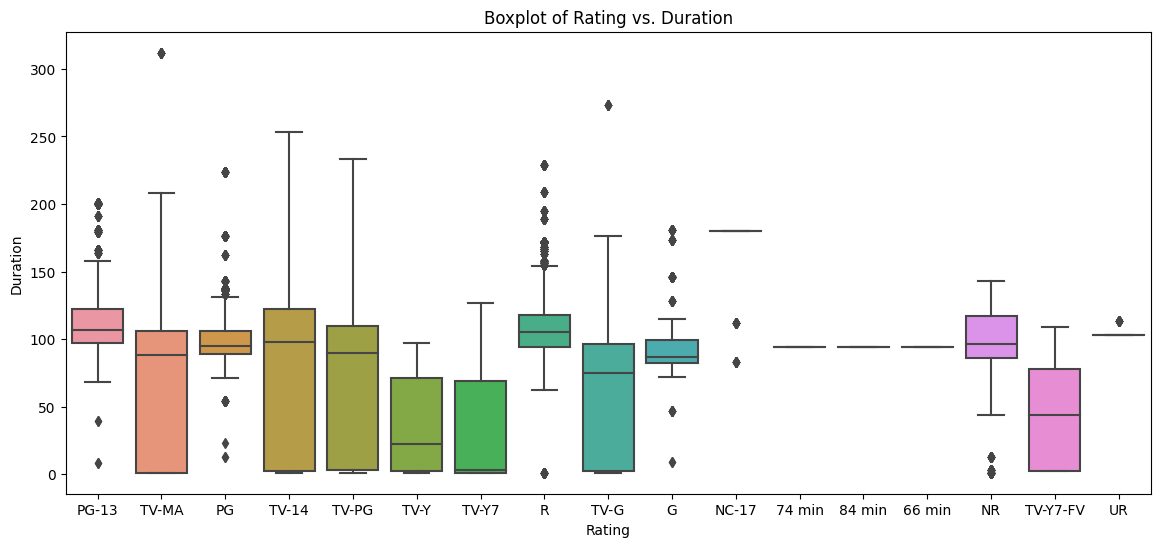

In [57]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='rating', y=time, data=df_pre_process)
plt.title('Boxplot of Rating vs. Duration')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

### 5. Missing Value & Outlier check

**Missing Values are handles in pre-processing stage itself now all values are filled**

In [58]:
df_pre_process.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
cast            0
country         0
genre           0
director        0
dtype: int64

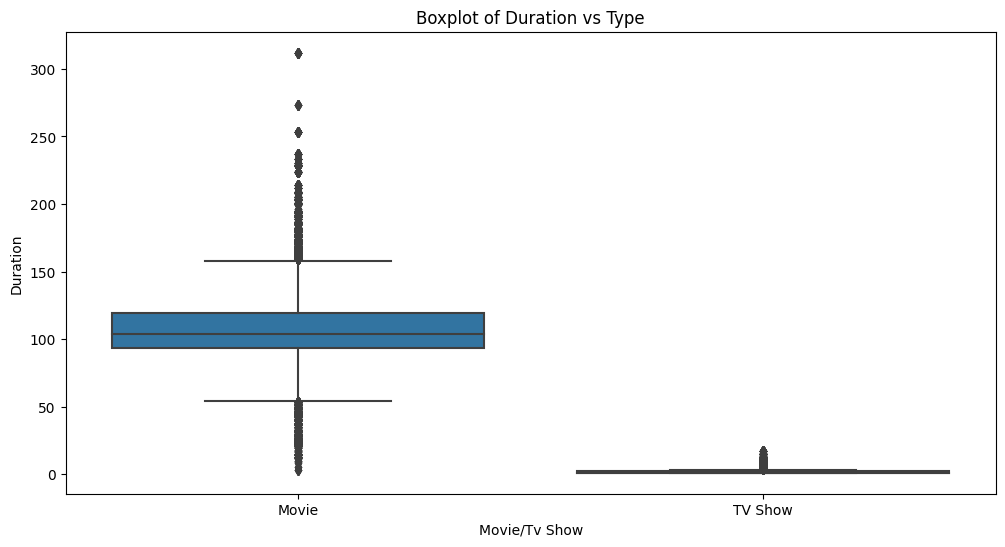

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type',y=time,data=df_pre_process)
plt.title('Boxplot of Duration vs Type')
plt.xlabel('Movie/Tv Show')
plt.ylabel('Duration')
plt.show()

**From above boxplot it is clear that Movies are calculated in Minutes thats why movie values are high and generally TV Show time is calculated in Seasons thats why for TV SHow we have low valees. But thre are outliers in both like some movies are short and some TV Shows may have more seasons**

### 6. Insights based on Non-Graphical and Visual Analysis

**6.1 Comments on the range of attributes**

In [64]:
df_pre_process.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,201991,8807,s7165,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,201991,2,Movie,145843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,201991,8807,Kahlil Gibran's The Prophet,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,201991,1767,"January 1, 2020",3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,201991.0,NaN,NaN,NaN,2013.452891,9.003933,1925.0,2012.0,2016.0,2019.0,2021.0
rating,201991,17,TV-MA,73934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,201991,220,1 Season,35035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,201991,8775,A troubled young girl and her mother find sola...,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,201991,36440,No Cast,2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,201991,128,United States,59349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_pre_process.shape

(201991, 12)

**Comments on the range of attributes**

* After the stage of Pre-Processing the data we have consisits of above shape. As we did unnesting rows got heavely increased

* Among the given data we can find type and rating as categorical and rest are continuous or object types

* Becaues of missing data we couldnt be able to completely fill some rows with accuarte data

**Comments on the distribution of the variables and relationship between them**

In [67]:
df_pre_process

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,International Movies,Mozez Singh
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,Music & Musicals,Mozez Singh
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,Dramas,Mozez Singh
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,International Movies,Mozez Singh


* Here most of variables of independent except we can see more movies in netflix are added from mid 2000's there the hist plot is Right Skewed

* The spead of variables also unique to each column at any point of month the movies added to netflix are more compared to TV Shows. It is understandable as movie is 
  uploaded once where as for TV Shoes Seasons and Episodes exits

**Comments for each univariate and bivariate plot**

* Histogram plot states that count of movies/tv shows started increasing in movies from mid 2000's as internet was booming then its the correct inference we can make

* Count plot of categorical variables type shows the same as above that Movies are more in number compared to TV Show

* Count on Ratings of diff type of ratings provided to Moves/TV Shows

Text(0.5, 1.0, 'Top 20 most watched Genre in Netflix')

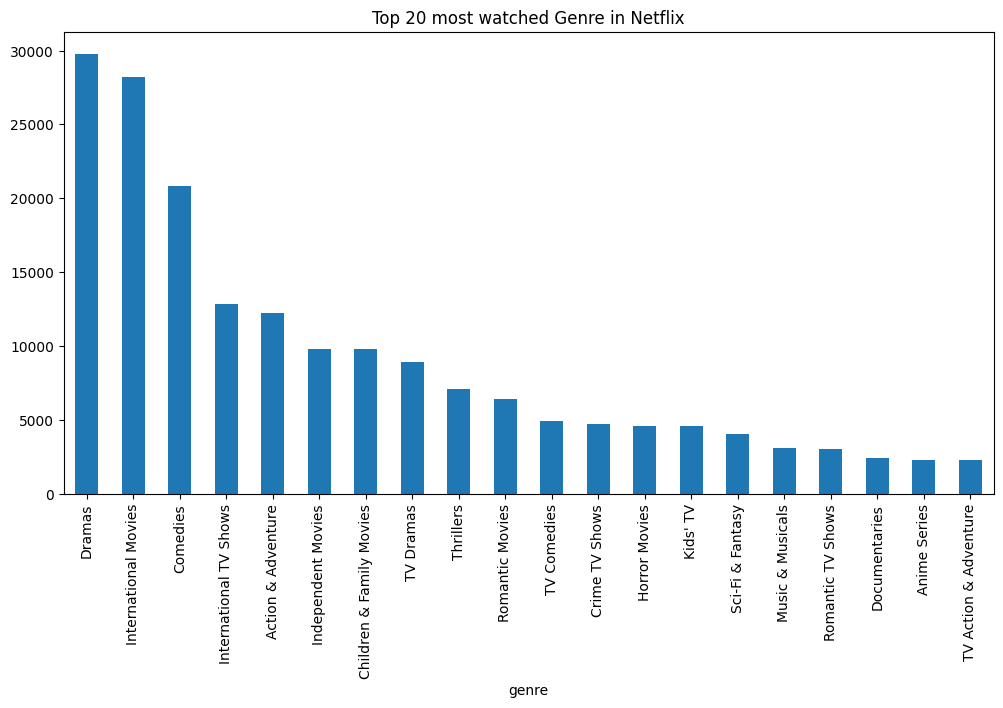

In [77]:
plt.figure(figsize=(12, 6))
df_pre_process['genre'].value_counts()[:20].plot(kind='bar')
plt.title('Top 20 most watched Genre in Netflix')

**From above graph we can say that more viewers like to watch Dramas and International Movies from Netflix**

# Business Insights

In [79]:
df_pre_process[['country','type']].value_counts()[:10]

country              type   
United States        Movie      45816
India                Movie      21411
United States        TV Show    13533
United Kingdom       Movie       8560
France               Movie       6607
Country Unavailable  Movie       6199
Canada               Movie       5738
Country Unavailable  TV Show     5698
Japan                TV Show     5154
United Kingdom       TV Show     4385
Name: count, dtype: int64

**From above data we can say that mostly Movies are preferred in top 10 countries and in U.K it seems TV Shows have high priority compared to Movies**

In [88]:
df_pre_process[['director','type']].value_counts()[:10]

director             type   
No Director          TV Show    49358
                     Movie       1285
Martin Scorsese      Movie        419
Youssef Chahine      Movie        409
Cathy Garcia-Molina  Movie        356
Steven Spielberg     Movie        355
Lars von Trier       Movie        336
Raja Gosnell         Movie        308
Tom Hooper           Movie        306
McG                  Movie        293
Name: count, dtype: int64

**Above data tells us that more directors in top 10 want to do movies rather than TV Shows**

<Axes: xlabel='country'>

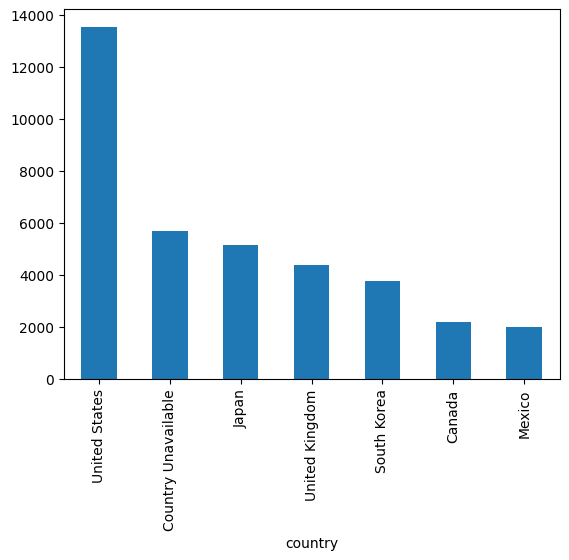

In [85]:
df_pre_process[['type','country']].value_counts()[:20].get('TV Show')
df_pre_process[['type','country']].value_counts()[:20].get('TV Show').plot(kind='bar')

**Top 10 countries that produce TV Shows. US is top in producing TV Shows**

<Axes: xlabel='country'>

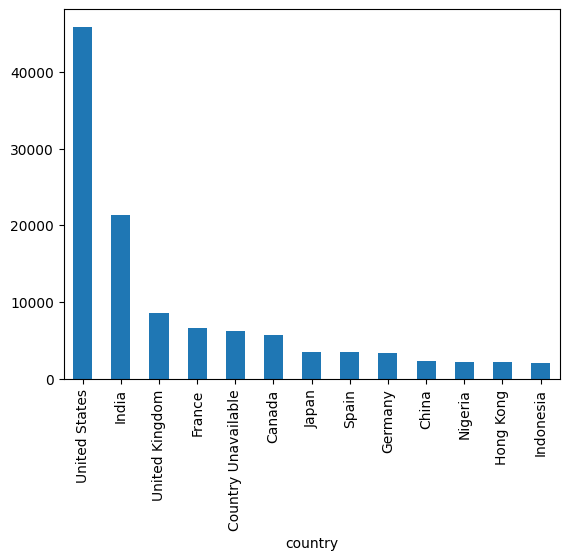

In [86]:
df_pre_process[['type','country']].value_counts()[:20].get('Movie')
df_pre_process[['type','country']].value_counts()[:20].get('Movie').plot(kind='bar')

**U.S and INDIA are the top countries to produce movies that are vailable in netflix**

In [89]:
x = pd.to_datetime(df_pre_process['date_added'], format='%B %d, %Y', errors='coerce')
df_pre_process['week_added'] = x.dt.isocalendar().week
df_pre_process

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director,week_added
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson,38
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director,38
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director,38
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director,38
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,International Movies,Mozez Singh,9
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,Music & Musicals,Mozez Singh,9
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,Dramas,Mozez Singh,9
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,International Movies,Mozez Singh,9


In [90]:
weekly_counts = df_pre_process.groupby('week_added')['type'].count()

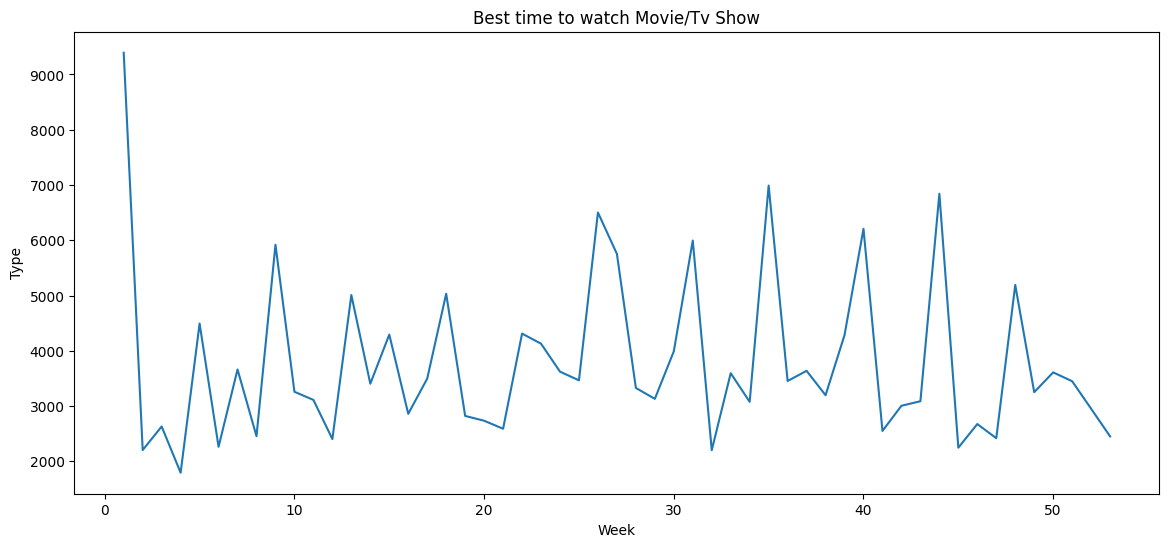

In [91]:
plt.figure(figsize=(14, 6))
weekly_counts.plot(kind='line')
plt.title('Best time to watch Movie/Tv Show')
plt.xlabel('Week')
plt.ylabel('Type')
plt.show()

<Axes: xlabel='day'>

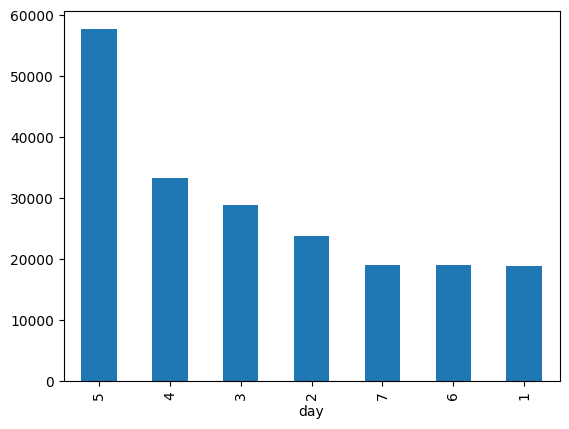

In [97]:
day_counts = x.dt.isocalendar().day
day_counts.value_counts().plot(kind='bar')

**From above lineplot and barplot we can say that in 1st Week, that is and on Holidays and on Day 5 that is Friday More viewers are present watching Netflix**

In [99]:
df_pre_process['month_added'] = x.dt.month
df_pre_process

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson,38,9.0
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director,38,9.0
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director,38,9.0
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director,38,9.0
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,International Movies,Mozez Singh,9,3.0
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,Music & Musicals,Mozez Singh,9,3.0
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,Dramas,Mozez Singh,9,3.0
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,International Movies,Mozez Singh,9,3.0


In [100]:
monthly_counts = df_pre_process.groupby('month_added')['type'].count()

<Axes: xlabel='month_added'>

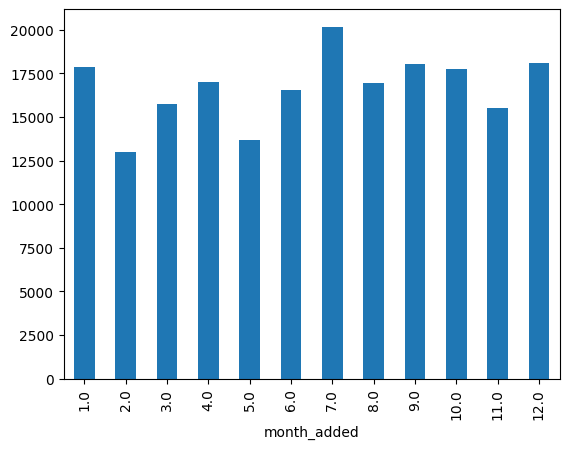

In [101]:
monthly_counts.plot(kind='bar')

**From above Graph we can say that best month to watch Movies/Tv Shows in Netflix is July that is 7th Month**

<Figure size 1000x600 with 0 Axes>

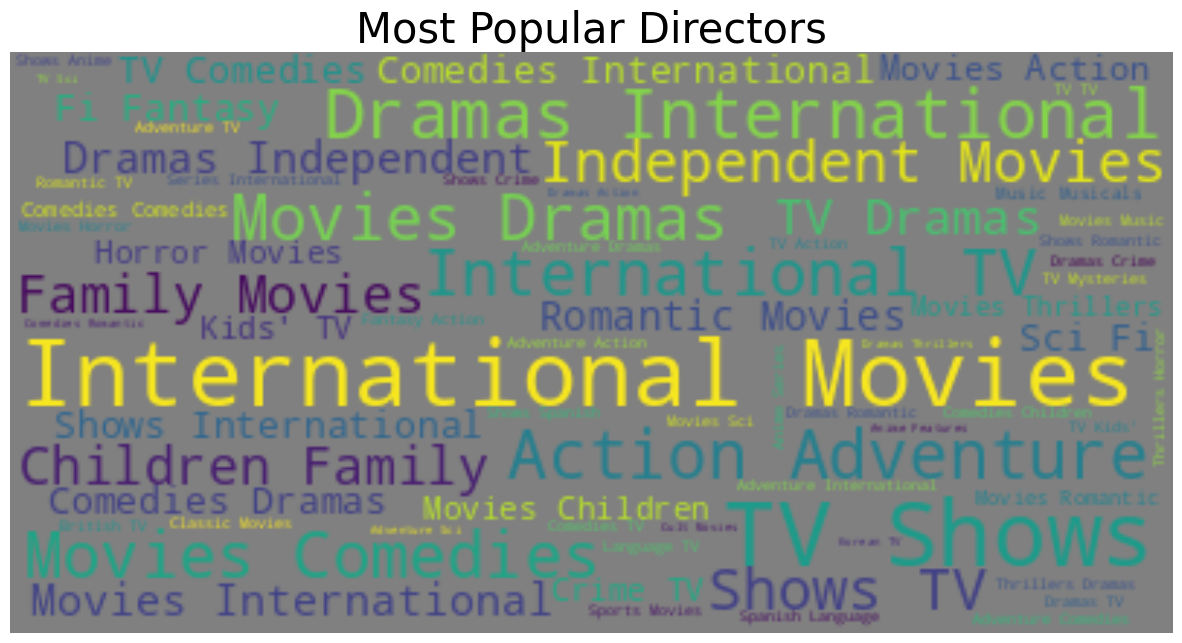

In [105]:
#pip install wordcloud matplotlib

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df_pre_process.genre)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()


**From above plot it is clear that International Movies Genre is produced more in netflix**

In [106]:
df_pre_process

,show_id,type,title,date_added,release_year,rating,duration,description,cast,country,genre,director,week_added,month_added
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",No Cast,United States,Documentaries,Kirsten Johnson,38,9.0
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,International TV Shows,No Director,38,9.0
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Dramas,No Director,38,9.0
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,South Africa,TV Mysteries,No Director,38,9.0
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,South Africa,International TV Shows,No Director,38,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,International Movies,Mozez Singh,9,3.0
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,India,Music & Musicals,Mozez Singh,9,3.0
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,Dramas,Mozez Singh,9,3.0
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,India,International Movies,Mozez Singh,9,3.0


**Finally the case study on netflix is done with above infrences and below are some recommendations based on above inferences**

# Recommendations

**RECOMMENDATIONS** 
* Netflix has to focus on TV Shows also because there are people who likes to see tv shows rather than movies 
* By approaching the top director we can plan some more movies/tv shows in order to increase the popularity 
* Not only reaching top director we can also see the director with less no of movies and having high rating as there may be some financial issues or anything so inorder to get good content netflix can reach to them and netflix can produce the movie and give the director a chance. 
* We have seen most no of international movies genre so need to give priority to other geners like hooro,comedy..etc 
* In TV Shows we may focus on thriller genre which will be helpfull for having more no of seasons 
* Most of the movies released in ott is in a year 2019 so we need to go on increasing this value in order to attract people by showing that getting subscription is usefull as netflix is releasing more movies per year 
* Mainly the release in ott should focus on the festival holidays, year end and week ends which is to be mainly focussed 
* Some movies can be released directly into ott which has some positive talk which may help in improving subscriptions 
* Should focus on a actor who has immense following and make use of it by doing a TV Shows or web series 
* Advertisement in the country which has very less movies released should be increased and attract people of that country by making their native TV Shows